In [1]:
# Import those libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy import genfromtxt
import matplotlib.image as mpimg
import pandas as pd
import scipy
import time
from operator import add
from scipy.stats import binom
from numpy import random
from joblib import Parallel, delayed
import collections
import csv

In [2]:
waloc = pd.read_csv('/Users/Yuval/Desktop/Thesis/all-wa-pos.csv')#use this for all 297 towns
waloc = waloc.loc[waloc['Population'] >0]
# When doing big towns
waloc = waloc[:58]

# When ignoring sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Yanchep') & (waloc['City / Town'] != 'Bullsbrook') &
                  (waloc['City / Town'] != 'Mundijong') & (waloc['City / Town'] != 'Serpentine') &
                 (waloc['City / Town'] != 'Two Rocks') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring rural sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Pinjarra') & (waloc['City / Town'] != 'Drummond Cove') &
                  (waloc['City / Town'] != 'Bridgetown') & (waloc['City / Town'] != 'Binningup') &
                 (waloc['City / Town'] != 'Dampier') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring 0 flow towns
waloc = waloc.loc[(waloc['City / Town'] != 'Kununurra') & (waloc['City / Town'] != 'Derby') &
                  (waloc['City / Town'] != 'Boddington-Ranford') & (waloc['City / Town'] != 'Wyndham')]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

In [3]:
## WA Data Processing
wa_data = pd.read_csv('/Users/Yuval/Desktop/Thesis/wa_health.csv')

# Daily cases
wa_totals = list(wa_data.iloc[0])[1:]
wa_totals = [i - 1134 for i in wa_totals]
wa_infs = [0]
for i in range(1,len(wa_totals)):
    wa_infs.append(wa_totals[i]-wa_totals[i-1])
    
total_popn = sum(list(waloc['Population']))

# WA's population is 2491996 people over 5
# https://www.health.gov.au/sites/default/files/documents/2022/02/covid-19-vaccine-rollout-update-1-february-2022.pdf
# There are 377018 people between 5-15, so normalise the third dose based on that

first = list(wa_data.loc[wa_data['Source'] == 'COVID-live First Doses 5+'].iloc[0])[1:]
first = [round(i/2491996*total_popn) for i in first]
first_change = []
for f in range(len(first)-1):
    first_change.append(first[f+1] - first[f])

second = list(wa_data.loc[wa_data['Source'] == 'COVID-live Second Doses 5+'].iloc[0])[1:]
second = [round(i/2491996*total_popn) for i in second]
second_change = []
for f in range(len(second)-1):
    second_change.append(second[f+1] - second[f])

third = list(wa_data.loc[wa_data['Source'] == 'COVID-live Booster Doses 16+'].iloc[0])[1:]
third = [round(i*2491996/(2491996-377018)) for i in third]
third = [round(i/2491996*total_popn) for i in third]
third_change = []
for f in range(len(third)-1):
    third_change.append(third[f+1] - third[f])

uptakes = [first_change, second_change, third_change]

In [4]:
# Make it so there are no negatives (there were only two when I checked)
for i in range(len(uptakes)):
    for j in range(len(uptakes[i])):
        if uptakes[i][j] < 0:
            print(i,j)
            uptakes[i][j] = 0

0 103
0 110


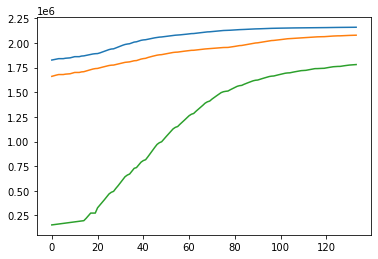

In [5]:
plt.plot(first)
plt.plot(second)
plt.plot(third)

In [11]:
diffs = []
for i in range(len(first)):
    for j in range(len(second)):
        if first[i] < second[j]:
            diffs.append(j-i)
            break
print('First to second', np.mean(diffs), 'Days')

diffs = []
for i in range(len(second)):
    for j in range(len(third)):
        if second[i] < third[j]:
            diffs.append(j-i)
            break
print('Second to third', np.mean(diffs), 'Days')

First to second 47.129629629629626 Days
Second to third 97.03571428571429 Days


In [ ]:
# Same for Adelaide

In [15]:
sa_vacc = pd.read_csv('/Users/Yuval/Desktop/Thesis/SA_Health_modified.csv')
# South Australia's population is 1.77 million
# 86% of the population is over the age of 12 = 1.5222 million
# 81.3% of the population is over the age of 16 = 1.4337 million
# Hence convert these percentages to numbers of people
sa_vacc.loc[sa_vacc['Type'] == 'First Dose (12+)'] = ['First Dose (12+)'] + list(round(sa_vacc.loc[sa_vacc['Type'] == 'First Dose (12+)'].iloc[:,1:]*1522200/100).iloc[0])
sa_vacc.loc[sa_vacc['Type'] == 'Second Dose (12+)'] = ['Second Dose (12+)'] + list(round(sa_vacc.loc[sa_vacc['Type'] == 'Second Dose (12+)'].iloc[:,1:]*1522200/100).iloc[0])
sa_vacc.loc[sa_vacc['Type'] == 'Third Dose (16+)'] = ['Third Dose (16+)'] + list(round(sa_vacc.loc[sa_vacc['Type'] == 'Third Dose (16+)'].iloc[:,1:]*1433700/100).iloc[0])

first = list(sa_vacc.loc[sa_vacc['Type'] == 'First Dose (12+)'].iloc[0])[1:]
first_change = []
for f in range(len(first)-1):
    first_change.append(first[f+1] - first[f])

second = list(sa_vacc.loc[sa_vacc['Type'] == 'Second Dose (12+)'].iloc[0])[1:]
second_change = []
for f in range(len(second)-1):
    second_change.append(second[f+1] - second[f])

third = list(sa_vacc.loc[sa_vacc['Type'] == 'Third Dose (16+)'].iloc[0])[1:]
third_change = []
for f in range(len(third)-1):
    third_change.append(third[f+1] - third[f])

uptakes = [first_change, second_change, third_change]


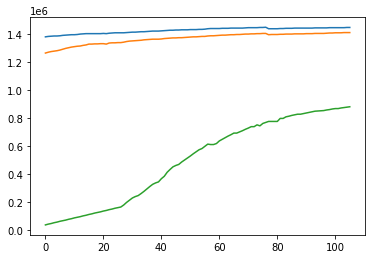

In [17]:
plt.plot(first)
plt.plot(second)
plt.plot(third)

In [16]:
diffs = []
for i in range(len(first)):
    for j in range(len(second)):
        if first[i] < second[j]:
            diffs.append(j-i)
            break
print('First to second', np.mean(diffs), 'Days')

diffs = []
for i in range(len(second)):
    for j in range(len(third)):
        if second[i] < third[j]:
            diffs.append(j-i)
            break
print('Second to third', np.mean(diffs), 'Days')

First to second 61.57142857142857 Days
Second to third nan Days


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Calculating Efficacy
https://www.nejm.org/doi/full/10.1056/NEJMoa2119451

Australia's vaccine agreements: https://www.health.gov.au/initiatives-and-programs/covid-19-vaccines/about-rollout/vaccine-agreements

TOTAL (excluding Nova) = 190 million

AstraZeneca = 54 million (28.4%)

Pfizer = 126 million doses (66.3%)

Moderna = 10 million (15 mil more available in first half of 2022) (5.3%)

Novavax (not in paper)= 51 million doses will be available in early 2022- numbers appear to be insignificant compared to the other big 3

In [1]:
astra_prop = 0.284
pfize_prop = 0.663
moder_prop = 0.053

In [2]:
# Dose 1
astra_eff = 0.177
pfize_eff = 0.315*19043/(19043+4548)+0.428*4548/(19043+4548)
moder_eff = 0.319*2086/(2086+981) + 0.479*981/(2086+981)

print(astra_eff,pfize_eff,moder_eff)

0.177 0.33678474842100803 0.37017704597326373


In [3]:
dose1_eff = astra_eff*astra_prop+pfize_eff*pfize_prop + moder_eff*moder_prop
print('Dose 1 Efficacy:',dose1_eff)

Dose 1 Efficacy: 0.2931756716397113


In [4]:
#Dose 2

ast_wek = [236,505,767,2974,23122,98970]
ast_vac = [0.489,0.337,0.286,0.178,0.04,-0.027]
ast_pop = sum(ast_wek)

pfi_wek = [3369,8768,25178,82221,55719,33983]
pfi_vac = [0.655,0.487,0.301,0.154,0.115,0.088]
pfi_pop = sum(pfi_wek)

mod_wek = [236,791,3828,11269,6107,731]
mod_vac = [0.751,0.528,0.356,0.253,0.15,0.149]
mod_pop = sum(mod_wek)

astra_eff = sum([ast_wek[i]*ast_vac[i]/ast_pop for i in range(len(ast_wek))])
pfize_eff = sum([pfi_wek[i]*pfi_vac[i]/pfi_pop for i in range(len(pfi_wek))])
moder_eff = sum([mod_wek[i]*mod_vac[i]/mod_pop for i in range(len(mod_wek))])

print(astra_eff,pfize_eff,moder_eff)

-0.005632965695956517 0.17260493791758666 0.2540579217838167


In [6]:
dose2_eff = astra_eff*astra_prop+pfize_eff*pfize_prop + moder_eff*moder_prop
print('Dose 2 Efficacy:',dose2_eff)

# Whether we choose to set Az vaccine efficacy to 0 overall or not does not make much of an overall impact- 12.8%
# becomes 12.6% when we have the negatives in there

Dose 2 Efficacy: 0.12630238143625058


In [59]:
# Dose 3

# 1&2_3rd_boost_(ppl in each week compartment, eff icacy of that compartment)

ast_pfi_boost_ppl = [17921,49169,55864,15570]
ast_pfi_boost_eff = [0.588,0.624,0.529,0.396]
ast_pfi_boost_ttl = sum(ast_pfi_boost_ppl)

ast_mod_boost_ppl = [8391,23165,8736]
ast_mod_boost_eff = [0.68,0.701,0.609]
ast_mod_boost_ttl = sum(ast_mod_boost_ppl)

ast_ast_boost_ppl = [41,131,164]
ast_ast_boost_eff = [0.577,0.556,0.467]
ast_ast_boost_ttl = sum(ast_ast_boost_ppl)

pfi_pfi_boost_ppl = [14615,21886,42854,41569]
pfi_pfi_boost_eff = [0.669,0.672,0.55,0.457]
pfi_pfi_boost_ttl = sum(pfi_pfi_boost_ppl)

pfi_mod_boost_ppl = [5307,7288,2807]
pfi_mod_boost_eff = [0.74,0.739,0.644]
pfi_mod_boost_ttl = sum(pfi_mod_boost_ppl)

mod_pfi_boost_ppl = [1393,1339]
mod_pfi_boost_eff = [0.643,0.649]
mod_pfi_boost_ttl = sum(mod_pfi_boost_ppl)

mod_mod_boost_ppl = [1136,1149]
mod_mod_boost_eff = [0.643,0.649]
mod_mod_boost_ttl = sum(mod_mod_boost_ppl)

ast_pfi_boost_overall = sum([ast_pfi_boost_ppl[i]*ast_pfi_boost_eff[i]/ast_pfi_boost_ttl for i in 
                             range(len(ast_pfi_boost_ppl))]) 
ast_mod_boost_overall = sum([ast_mod_boost_ppl[i]*ast_mod_boost_eff[i]/ast_mod_boost_ttl for i in 
                             range(len(ast_mod_boost_ppl))])
ast_ast_boost_overall = sum([ast_ast_boost_ppl[i]*ast_ast_boost_eff[i]/ast_ast_boost_ttl for i in 
                             range(len(ast_ast_boost_ppl))])
pfi_pfi_boost_overall = sum([pfi_pfi_boost_ppl[i]*pfi_pfi_boost_eff[i]/pfi_pfi_boost_ttl for i in 
                             range(len(pfi_pfi_boost_ppl))])
pfi_mod_boost_overall = sum([pfi_mod_boost_ppl[i]*pfi_mod_boost_eff[i]/pfi_mod_boost_ttl for i in 
                             range(len(pfi_mod_boost_ppl))])
mod_pfi_boost_overall = sum([mod_pfi_boost_ppl[i]*mod_pfi_boost_eff[i]/mod_pfi_boost_ttl for i in 
                             range(len(mod_pfi_boost_ppl))])
mod_mod_boost_overall = sum([mod_mod_boost_ppl[i]*mod_mod_boost_eff[i]/mod_mod_boost_ttl for i in 
                             range(len(mod_mod_boost_ppl))])


# ast_booster = ast_ast_boost_overall
# pfi_booster = pfi_pfi_boost_overall*pfi_pfi_boost_ttl/(pfi_pfi_boost_ttl+mod_pfi_boost_ttl+ast_pfi_boost_ttl) + mod_pfi_boost_overall*mod_pfi_boost_ttl/(pfi_pfi_boost_ttl+mod_pfi_boost_ttl+ast_pfi_boost_ttl) + ast_pfi_boost_overall*ast_pfi_boost_ttl/(pfi_pfi_boost_ttl+mod_pfi_boost_ttl+ast_pfi_boost_ttl)
# mod_booster = pfi_mod_boost_overall*pfi_mod_boost_ttl/(pfi_mod_boost_ttl+mod_mod_boost_ttl+ast_mod_boost_ttl) + mod_mod_boost_overall*mod_mod_boost_ttl/(pfi_mod_boost_ttl+mod_mod_boost_ttl+ast_mod_boost_ttl) + ast_mod_boost_overall*ast_mod_boost_ttl/(pfi_mod_boost_ttl+mod_mod_boost_ttl+ast_mod_boost_ttl)

ast_booster = pfize_prop*ast_pfi_boost_overall + moder_prop*ast_mod_boost_overall + astra_prop*ast_ast_boost_overall
pfi_booster = pfize_prop/(pfize_prop+moder_prop)*pfi_pfi_boost_overall + moder_prop/(pfize_prop+moder_prop)*pfi_mod_boost_overall
mod_booster = pfize_prop/(pfize_prop+moder_prop)*mod_pfi_boost_overall + moder_prop/(pfize_prop+moder_prop)*mod_mod_boost_overall


print(ast_booster,pfi_booster, mod_booster)

0.5503915007122326 0.5668949199840793 0.6459463555021636


In [60]:
dose3_eff = ast_booster*astra_prop+pfi_booster*pfize_prop + mod_booster*moder_prop
print('Dose 3 Efficacy:',dose3_eff)

Dose 3 Efficacy: 0.5663976749933334
